## Data

Before running this notebook, be sure to follow these steps:

1. Download the `VM2Uniform--MA--2022-08-19` zip from https://drive.google.com/drive/folders/1DyCevtTWTMMNrZXsCycLGiSA_uc6lq8r

2. Extract `VM2Uniform--MA--2022-08-19.tab` to `../data/`

3. Download the three datasets containing 311 data from 2010 to 2024 from https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/CVKM87

4. Place all four .csv files into the ``data`` folder

In [1]:
import pandas as pd
import numpy as np

Reads the three .csv files containing 311 data:

In [2]:
df1 = pd.read_csv('../data/311 Cases 2010_2014 Unrestricted.csv')
df2 = pd.read_csv('../data/311 Cases 2015_2019 Unrestricted.csv')
df3 = pd.read_csv('../data/311 Cases 2020_2024 Unrestricted.csv')

C:\Users\ivanb\AppData\Local\Temp\ipykernel_23388\2849313675.py:3: DtypeWarning: Columns (16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv('../data/311 Cases 2020_2024 Unrestricted.csv')


Concatenates all three subsets into one large dataset:

In [3]:
df_311 = pd.concat([df1, df2, df3])

Drops rows that do not contain the GEOID needed to match Boston Social Vulnerability data:

In [5]:
df_311.dropna(subset=["CT_ID_10"], inplace=True)

Converts the GEOID from float to int:

In [6]:
df_311["CT_ID_10"] = df_311["CT_ID_10"].astype(np.int64)

In [27]:
df_311_closed = df_311.dropna(subset=["CLOSED_DT"])
df_311_closed["OPEN_DT"] = pd.to_datetime(df_311_closed["OPEN_DT"], format='%Y-%m-%d')
df_311_closed["CLOSED_DT"] = pd.to_datetime(df_311_closed["CLOSED_DT"], format='%Y-%m-%d')

df_311_closed

C:\Users\ivanb\AppData\Local\Temp\ipykernel_23388\700503551.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_311_closed["OPEN_DT"] = pd.to_datetime(df_311_closed["OPEN_DT"], format='%Y-%m-%d')
C:\Users\ivanb\AppData\Local\Temp\ipykernel_23388\700503551.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_311_closed["CLOSED_DT"] = pd.to_datetime(df_311_closed["CLOSED_DT"], format='%Y-%m-%d')


,Unnamed: 0,TYPE,CASE_ENQUIRY_ID,CLOSED_DT,LOCATION,OPEN_DT,REASON,SOURCE,SUBJECT,LocationID,...,PUBLIC,HOUSING,UNCIVILUSE,BIGBUILD,GRAFFITI,TRASH,PRIVATENEGLECT,PUBLICDENIG,PROBLEM,propid
4,259240.0,General Lighting Request,101000102004,2010-03-10,"INTERSECTION of Mount Vernon St & Walnut St, B...",2010-01-01,Street Lights,Constituent Call,Public Works Department,NaN,...,1,0,0,0,0,0,0,0,0,NaN
9,271440.0,General Request,101000101992,2010-01-05,"223-231 Berkeley St, Boston, MA 02116",2010-01-01,General Request,Mobile Request,Mayor's 24 Hour Hotline,5.012390e+08,...,0,0,0,0,0,0,0,0,0,NaN
10,271445.0,General Request,101000101923,2010-01-03,"490 Commonwealth Ave, Boston, MA 02215",2010-01-01,General Request,Constituent Call,Mayor's 24 Hour Hotline,5.039240e+08,...,0,0,0,0,0,0,0,0,0,NaN
11,271452.0,General Request,101000102032,2010-01-20,"69 Maywood St, Roxbury, MA 02119",2010-01-01,General Request,Constituent Call,Mayor's 24 Hour Hotline,1.200994e+09,...,0,0,0,0,0,0,0,0,0,NaN
12,271455.0,General Request,101000101996,2010-01-20,"9 Sargent St, Dorchester, MA 02125",2010-01-01,General Request,Constituent Call,Mayor's 24 Hour Hotline,1.300613e+09,...,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621959,NaN,Sign Repair,101004112684,2022-01-03,"INTERSECTION of Morton St & Forest Hills Ave, ...",2021-12-31,Signs & Signals,Mobile Request,Transportation - Traffic Division,NaN,...,1,0,0,0,0,0,0,0,0,I15431
621960,NaN,Sign Repair,101004113039,2022-01-04,INTERSECTION of William T Morrissey Blvd & Mou...,2021-12-31,Signs & Signals,Mobile Request,Transportation - Traffic Division,NaN,...,1,0,0,0,0,0,0,0,0,I17499
621961,NaN,Street Light Knock Downs,101004112575,2022-05-31,INTERSECTION of Charlesgate E & Commonwealth A...,2021-12-31,Street Lights,Constituent Call,Public Works Department,NaN,...,1,0,0,0,0,0,0,0,0,I17185
621962,NaN,Street Light Outages,101004113151,2022-01-03,"INTERSECTION of Kneeland St & Interstate 93 S,...",2021-12-31,Street Lights,Mobile Request,Public Works Department,NaN,...,1,0,0,0,0,0,0,0,0,I17238


In [34]:
df_311_closed["CLOSE_TIME"] = df_311_closed["CLOSED_DT"] - df_311_closed["OPEN_DT"]

df_311_closed["CLOSE_TIME"]

C:\Users\ivanb\AppData\Local\Temp\ipykernel_23388\1015966226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_311_closed["CLOSE_TIME"] = df_311_closed["CLOSED_DT"] - df_311_closed["OPEN_DT"]


4         68 days
9          4 days
10         2 days
11        19 days
12        19 days
           ...   
621959     3 days
621960     4 days
621961   151 days
621962     3 days
621963     0 days
Name: CLOSE_TIME, Length: 2250692, dtype: timedelta64[ns]

In [42]:
df_311_mean_close = df_311_closed[["CT_ID_10", "CLOSE_TIME"]].groupby(["CT_ID_10"]).mean()
df_311_mean_close.to_csv("../data/311_mean_close_df.csv")

In [ ]:
suffolk_start_idx = 3300000
num_rows = 700000

uniform_2022_MA = pd.read_csv("../data/VM2Uniform--MA--2022-08-19.tab", delimiter="\t", skiprows= range(1, suffolk_start_idx), nrows=num_rows, encoding = "ISO-8859-1")

In [ ]:
uniform_subset = uniform_2022_MA[["LALVOTERID", "County", "Voters_FIPS", "Residence_Addresses_CensusTract", "Residence_Addresses_CensusBlock", "General_2022", "General_2018", "General_2014", "General_2010", "General_2006", "General_2002"]]
uniform_subset.dropna(subset=["LALVOTERID", "County", "Voters_FIPS", "Residence_Addresses_CensusTract", "Residence_Addresses_CensusBlock"], inplace=True)

In [ ]:
# only keep SUFFOLK
uniform_subset = uniform_subset[uniform_subset["Voters_FIPS"] == 25]
uniform_subset

In [252]:
# replace voter NAN with 0 Y with 1

uniform_subset[["General_2022", "General_2018", "General_2014", "General_2010", "General_2006", "General_2002"]] = \
uniform_subset[["General_2022", "General_2018", "General_2014", "General_2010", "General_2006", "General_2002"]].replace(np.nan, 0)

uniform_subset[["General_2022", "General_2018", "General_2014", "General_2010", "General_2006", "General_2002"]] = \
uniform_subset[["General_2022", "General_2018", "General_2014", "General_2010", "General_2006", "General_2002"]].replace("Y", 1)

uniform_subset[["General_2022", "General_2018", "General_2014", "General_2010", "General_2006", "General_2002"]]

,General_2022,General_2018,General_2014,General_2010,General_2006,General_2002
0,0.0,1,1,0,0,1
1,0.0,1,1,1,1,1
2,0.0,0,1,1,1,1
3,0.0,0,0,0,0,0
4,0.0,1,0,0,0,0
...,...,...,...,...,...,...
405339,0.0,0,0,1,0,0
405340,0.0,0,0,0,0,0
405341,0.0,1,0,1,0,0
405342,0.0,1,1,1,1,1


In [253]:
# convert to int first
uniform_subset[["Voters_FIPS", "Residence_Addresses_CensusTract", "Residence_Addresses_CensusBlock"]] = uniform_subset[["Voters_FIPS", "Residence_Addresses_CensusTract", "Residence_Addresses_CensusBlock"]].astype(int)

# then to string
uniform_subset[["Voters_FIPS", "Residence_Addresses_CensusTract", "Residence_Addresses_CensusBlock"]] = uniform_subset[["Voters_FIPS", "Residence_Addresses_CensusTract", "Residence_Addresses_CensusBlock"]].astype(str)

In [254]:
uniform_subset["Voters_FIPS"] = uniform_subset["Voters_FIPS"].str.zfill(3)
uniform_subset

uniform_subset["Residence_Addresses_CensusTract"] = uniform_subset["Residence_Addresses_CensusTract"].str.zfill(5)
uniform_subset

uniform_subset["Residence_Addresses_CensusBlock"] = uniform_subset["Residence_Addresses_CensusBlock"].str.zfill(4)
uniform_subset

,LALVOTERID,County,Voters_FIPS,Residence_Addresses_CensusTract,Residence_Addresses_CensusBlock,General_2022,General_2018,General_2014,General_2010,General_2006,General_2002
0,LALMA162975018,SUFFOLK,025,30302,1046,0.0,1,1,0,0,1
1,LALMA162975305,SUFFOLK,025,30302,1046,0.0,1,1,1,1,1
2,LALMA162981493,SUFFOLK,025,30302,1046,0.0,0,1,1,1,1
3,LALMA604129415,SUFFOLK,025,30302,1046,0.0,0,0,0,0,0
4,LALMA162426442,SUFFOLK,025,30302,1046,0.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
405339,LALMA160261796,SUFFOLK,025,180101,1005,0.0,0,0,1,0,0
405340,LALMA160176569,SUFFOLK,025,180101,1005,0.0,0,0,0,0,0
405341,LALMA162563868,SUFFOLK,025,180101,1005,0.0,1,0,1,0,0
405342,LALMA162736655,SUFFOLK,025,180101,1005,0.0,1,1,1,1,1


https://www.mass.gov/info-details/massgis-data-2010-us-census

The tables in each of the aforementioned databases all contain the field LOGRECNO which serves as the unique identifier for the purpose of linking to the various 2010 Census geographies provided by MassGIS.  Furthermore, most of the tables also contain a GEOID10 field added by MassGIS that represents a unique geographic  ID and is generated by a concatenation of constituent geography codes:

i.e. 250092213001002 = STATE CODE (“25” for MA) + COUNTY (“009” – Essex County) + CENSUS TRACT (“221300”) + CENSUS BLOCK (“1002”)

In [255]:
# we only focus on CENSUS TRACT here

uniform_subset["GEOID10"] = str(25) + uniform_subset["Voters_FIPS"] + uniform_subset["Residence_Addresses_CensusTract"] # + uniform_subset["Residence_Addresses_CensusBlock"]
print(f'found {len(uniform_subset["GEOID10"].unique())} unique GEOIDs')
uniform_subset

found 212 unique GEOIDs


,LALVOTERID,County,Voters_FIPS,Residence_Addresses_CensusTract,Residence_Addresses_CensusBlock,General_2022,General_2018,General_2014,General_2010,General_2006,General_2002,GEOID10
0,LALMA162975018,SUFFOLK,025,30302,1046,0.0,1,1,0,0,1,2502530302
1,LALMA162975305,SUFFOLK,025,30302,1046,0.0,1,1,1,1,1,2502530302
2,LALMA162981493,SUFFOLK,025,30302,1046,0.0,0,1,1,1,1,2502530302
3,LALMA604129415,SUFFOLK,025,30302,1046,0.0,0,0,0,0,0,2502530302
4,LALMA162426442,SUFFOLK,025,30302,1046,0.0,1,0,0,0,0,2502530302
...,...,...,...,...,...,...,...,...,...,...,...,...
405339,LALMA160261796,SUFFOLK,025,180101,1005,0.0,0,0,1,0,0,25025180101
405340,LALMA160176569,SUFFOLK,025,180101,1005,0.0,0,0,0,0,0,25025180101
405341,LALMA162563868,SUFFOLK,025,180101,1005,0.0,1,0,1,0,0,25025180101
405342,LALMA162736655,SUFFOLK,025,180101,1005,0.0,1,1,1,1,1,25025180101


In [256]:
total_voters = uniform_subset[["GEOID10", "General_2022", "General_2018", "General_2014", "General_2010", "General_2006", "General_2002"]].groupby(by=["GEOID10"]).count()
voted_voters = uniform_subset[["GEOID10", "General_2022", "General_2018", "General_2014", "General_2010", "General_2006", "General_2002"]].groupby(by=["GEOID10"]).sum()

In [ ]:
# turnout
turnout_per_year_by_GEOID10 = voted_voters / total_voters

# save
turnout_per_year_by_GEOID10.to_csv("../data/turnout_per_year_by_GEOID10.csv")

turnout_per_year_by_GEOID10 = turnout_per_year_by_GEOID10.reset_index()
turnout_per_year_by_GEOID10["GEOID10"] = turnout_per_year_by_GEOID10["GEOID10"].astype(np.int64)

turnout_per_year_by_GEOID10

In [57]:
# load turnouts
turnout_per_year_by_GEOID10 = pd.read_csv("../data/turnout_per_year_by_GEOID10.csv")
turnout_per_year_by_GEOID10

,GEOID10,General_2022,General_2018,General_2014,General_2010,General_2006,General_2002
0,2502500101,0.0,0.476871,0.223717,0.185029,0.164844,0.134567
1,2502500102,0.0,0.375646,0.192993,0.159678,0.141298,0.106261
2,2502500201,0.0,0.502951,0.249157,0.215008,0.171164,0.143339
3,2502500202,0.0,0.455312,0.264334,0.240725,0.211214,0.179595
4,2502500301,0.0,0.519956,0.301552,0.259424,0.218958,0.191242
...,...,...,...,...,...,...,...
207,25025981201,0.0,0.375000,0.250000,0.000000,0.000000,0.125000
208,25025981202,0.0,0.451613,0.290323,0.225806,0.193548,0.258065
209,25025981502,0.0,1.000000,0.000000,1.000000,0.000000,0.000000
210,25025981700,0.0,0.857143,0.285714,0.428571,0.571429,0.428571


In [58]:
# laod 311 closure times
df_311_mean_close = pd.read_csv("../data/311_mean_close_df.csv")
df_311_mean_close

,CT_ID_10,CLOSE_TIME
0,25017373600,7 days 16:00:00
1,25021400100,32 days 05:42:51.428571428
2,25021400202,13 days 02:18:47.710843373
3,25021400600,0 days 18:00:00
4,25021401201,40 days 03:00:00
...,...,...
228,25025981502,19 days 15:25:42.857142857
229,25025981600,18 days 05:18:08.372093023
230,25025981700,23 days 17:43:35.197568389
231,25025981800,29 days 04:39:48.799321171


In [146]:
closure_time_turnout = df_311_mean_close.join(turnout_per_year_by_GEOID10.set_index('GEOID10'), on='CT_ID_10')

subset_closure_time_turnout = closure_time_turnout.dropna()

subset_closure_time_turnout.head()

,CT_ID_10,CLOSE_TIME,General_2022,General_2018,General_2014,General_2010,General_2006,General_2002
168,25025100100,29 days 05:05:53.869136540,0.0,0.358926,0.273302,0.248341,0.201580,0.132070
169,25025100200,24 days 18:50:11.995473406,0.0,0.398851,0.285057,0.279310,0.249425,0.168966
170,25025100300,20 days 17:57:35.525606469,0.0,0.407569,0.307525,0.295781,0.264898,0.180078
171,25025100400,21 days 08:37:49.731504732,0.0,0.488344,0.353012,0.338783,0.296397,0.208295
172,25025100500,21 days 01:29:17.080153426,0.0,0.430067,0.290435,0.255527,0.219688,0.159181


In [147]:
# save data to csv

subset_closure_time_turnout.to_csv("../data/subset_closure_time_voter_turnout.csv")

In [148]:
subset_closure_time_turnout["CLOSE_TIME"] = pd.to_timedelta(subset_closure_time_turnout["CLOSE_TIME"])
subset_closure_time_turnout.sort_values(by="CLOSE_TIME", inplace=True)

C:\Users\ivanb\AppData\Local\Temp\ipykernel_23388\698299706.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_closure_time_turnout["CLOSE_TIME"] = pd.to_timedelta(subset_closure_time_turnout["CLOSE_TIME"])
C:\Users\ivanb\AppData\Local\Temp\ipykernel_23388\698299706.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_closure_time_turnout.sort_values(by="CLOSE_TIME", inplace=True)


In [149]:
subset_closure_time_turnout["CLOSE_TIME"] = subset_closure_time_turnout["CLOSE_TIME"].astype('timedelta64[D]')
subset_closure_time_turnout = subset_closure_time_turnout[subset_closure_time_turnout["CLOSE_TIME"] < 40]

C:\Users\ivanb\AppData\Local\Temp\ipykernel_23388\2156558034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_closure_time_turnout["CLOSE_TIME"] = subset_closure_time_turnout["CLOSE_TIME"].astype('timedelta64[D]')


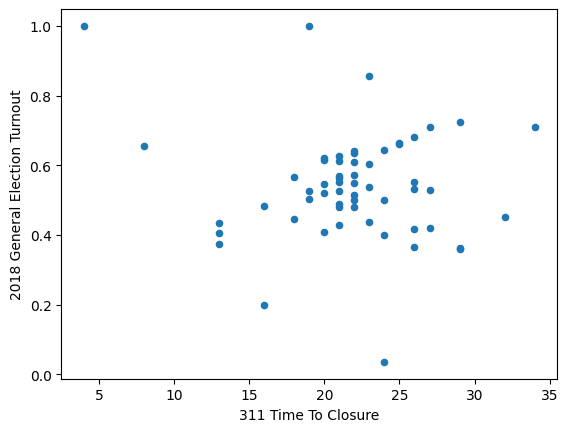

In [159]:
from matplotlib import pyplot as plt

subset_closure_time_turnout.plot.scatter(x = "CLOSE_TIME", y = "General_2018")

plt.xlabel("311 Time To Closure")
plt.ylabel("2018 General Election Turnout")

plt.show()

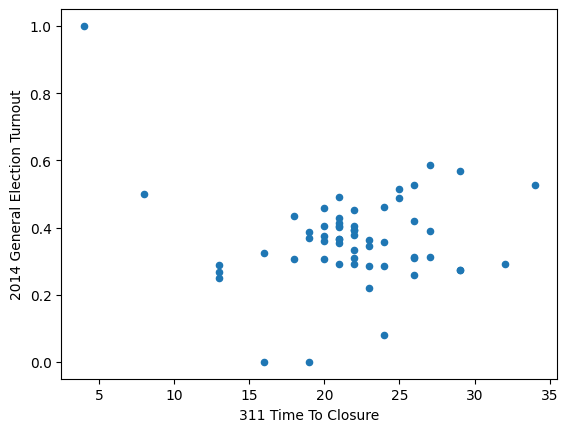

In [160]:
from matplotlib import pyplot as plt

subset_closure_time_turnout.plot.scatter(x = "CLOSE_TIME", y = "General_2014")

plt.xlabel("311 Time To Closure")
plt.ylabel("2014 General Election Turnout")

plt.show()

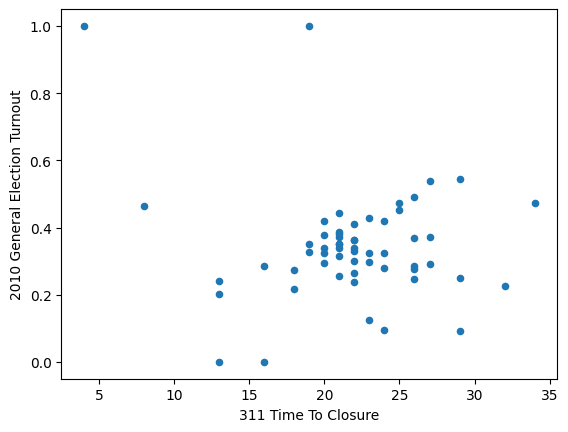

In [161]:
from matplotlib import pyplot as plt

subset_closure_time_turnout.plot.scatter(x = "CLOSE_TIME", y = "General_2010")

plt.xlabel("311 Time To Closure")
plt.ylabel("2010 General Election Turnout")

plt.show()

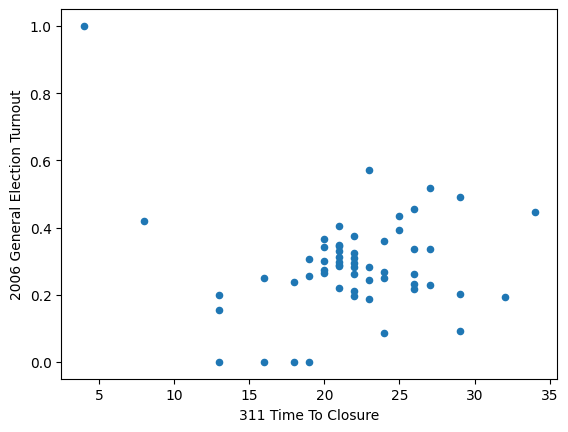

In [162]:
from matplotlib import pyplot as plt

subset_closure_time_turnout.plot.scatter(x = "CLOSE_TIME", y = "General_2006")

plt.xlabel("311 Time To Closure")
plt.ylabel("2006 General Election Turnout")

plt.show()

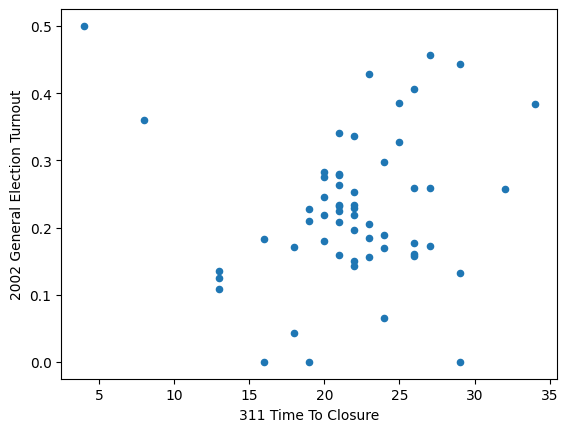

In [163]:
from matplotlib import pyplot as plt

subset_closure_time_turnout.plot.scatter(x = "CLOSE_TIME", y = "General_2002")

plt.xlabel("311 Time To Closure")
plt.ylabel("2002 General Election Turnout")

plt.show()